## Polynomial Regression

Polynomial regression adds additional flexibility to the linear regression model to model non-linear trends. It should be noted specifically here that the data modeled here are not longitudinal data. These are data that are collected at a single time point, but the form of relationship is non-linear. 

There are non-linear regression models that can be specified directly. Those are more challenging, difficult to interpret, and difficult to estimate. I also do not personally use those types of methods, therefore, the focus in this section of notes is to show that non-linear trends can be modeled using linear regression and maintain the additivity of the model. 

The key to modeling non-linear trends using a linear regression model, is to add polynomial terms. For example, suppose we think that believe there is a non-linear trend. The simplest model would look like the following:

$$
Y = \beta_{0} + \beta_{1} X + \beta_{2} X^{2} + \epsilon
$$

In this model, the single $X$ attribute/predictor is included. The model includes the linear association, but also includes a quadratic association which would estimate/allow the regression line to be curvilinear rather than straight. Further polynomial terms (i.e., cubic, quartic, etc.) could be added. These terms are challenging to interpret, therefore, often visualizing the relationship helps to identify the effect of the non-linearity. 

$$
Y = \beta_{0}^{\beta_{1} X} + \epsilon
$$

### Example

We will again use simulated data to show the model, but will base this on a real research paper:

Glomb, T. M., & Welsh, E. T. (2005). Can opposites attract? Personality heterogeneity in supervisor-subordinate dyads as a predictor of subordinate outcomes. Journal of Applied Psychology, 90(4), 749.

This study looked to explore "Hypothesis 1: Differences between the supervisor and the subordinate in control traits (with the supervisor being higher) will be related to higher subordinate satisfaction with the supervisor."

$$
satisfaction = \beta_{0} + \beta_{1} sup\_control + \beta_{2} sub\_control + \beta_{3} sup\_control^2 + \beta_{4} sub\_control^2 + \epsilon
$$

In [18]:
library(tidyverse)
library(ggformula)
library(mosaic)
library(simglm)

theme_set(theme_bw(base_size = 16))

sim_args <- list(
    formula = satisfaction ~ 1 + poly(sup_control, degree = 2, raw = TRUE) + poly(sub_control, degree = 2, raw = TRUE),
    fixed = list(
        sup_control = list(var_type = 'continuous', 
        mean = 0, sd = 10.93),
        sub_control = list(var_type = 'continuous', 
        mean = 0, sd = 9.81)
    ),
    error = list(variance = 50),
    sample_size = 200,
    reg_weights = c(0, .109, -0.03, -.109, 0)
)

satis_data <- simulate_fixed(data = NULL, sim_args) |> 
  simulate_error(sim_args) |>
  generate_response(sim_args)

head(satis_data)

,X.Intercept.,sup_control_1,sup_control_2,sub_control_1,sub_control_2,sup_control,sub_control,level1_id,error,fixed_outcome,random_effects,satisfaction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
1,1,-10.320213,106.506792,-9.335169,87.145375,-10.320213,-9.335169,1,-3.788325,-3.30257356,0,-7.090898
2,1,25.541799,652.383519,-3.103450,9.631400,25.541799,-3.103450,2,5.425614,-16.44917341,0,-11.023560
3,1,11.641170,135.516847,5.807842,33.731026,11.641170,5.807842,3,-14.998449,-3.42967260,0,-18.428121
4,1,10.284074,105.762178,12.903001,166.487434,10.284074,12.903001,4,-4.537183,-3.45832837,0,-7.995511
5,1,-5.485602,30.091832,8.351777,69.752174,-5.485602,8.351777,5,-10.694505,-2.41102926,0,-13.105534
6,1,-1.562084,2.440108,-2.144205,4.597613,-1.562084,-2.144205,6,7.062657,-0.00975213,0,7.052905


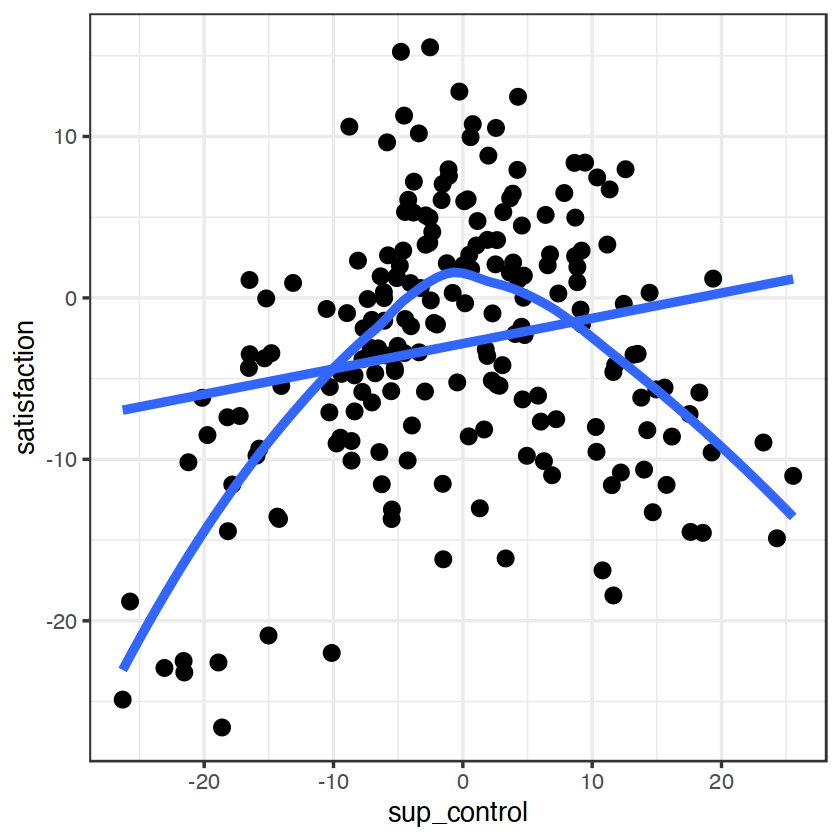

In [19]:
gf_point(satisfaction ~ sup_control, data = satis_data, size = 4) |>
  gf_smooth(method = 'lm', linewidth = 2) |>
  gf_smooth(method = 'loess', linewidth = 2)

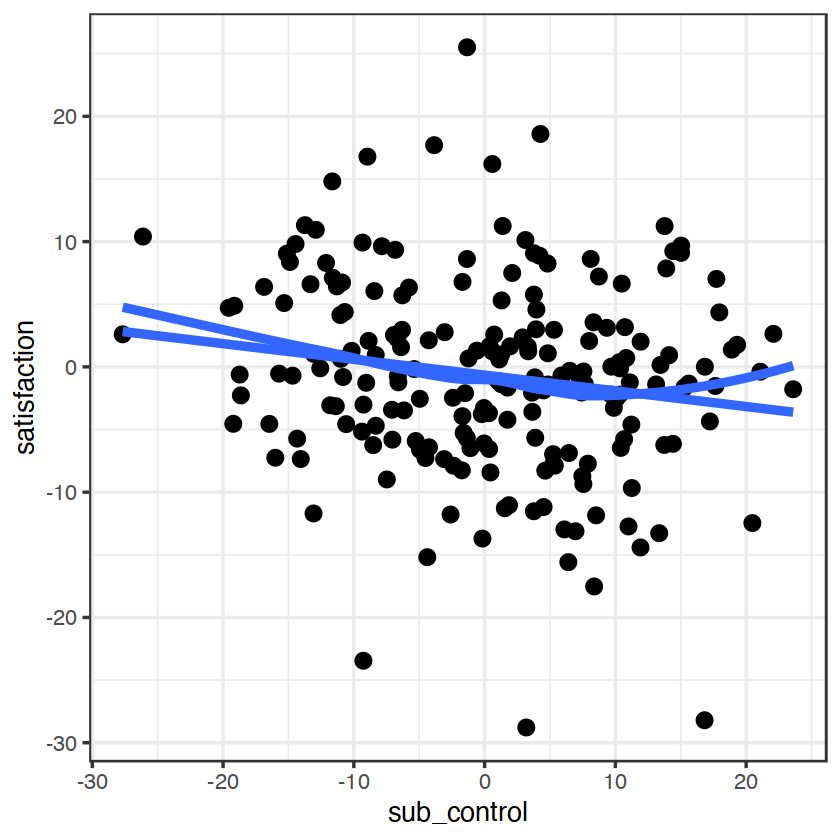

In [15]:
gf_point(satisfaction ~ sub_control, data = satis_data, size = 4) |>
  gf_smooth(method = 'lm', linewidth = 2) |>
  gf_smooth(method = 'loess', linewidth = 2)

In [8]:
lm(satisfaction ~ 1 + sup_control + sub_control, data = satis_data) |> 
   broom::tidy() |> 
   mutate_if(is.double, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-15.085,1.317,-11.457,0.000
sup_control,-0.035,0.119,-0.297,0.766
sub_control,0.020,0.130,0.157,0.876


In [20]:
lm(satisfaction ~ 1 + sup_control + sub_control + 
    I(sup_control^2) + I(sub_control^2) + 
    I(sup_control^3), data = satis_data) |> 
   broom::tidy() |> 
   mutate_if(is.double, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.506,0.680,0.743,0.458
sup_control,0.064,0.083,0.773,0.440
sub_control,-0.142,0.049,-2.885,0.004
I(sup_control^2),-0.031,0.003,-9.421,0.000
I(sub_control^2),-0.002,0.004,-0.522,0.602
I(sup_control^3),0.000,0.000,0.670,0.503


In [10]:
tmp <- lm(satisfaction ~ 1 + sup_control + sub_control + I(sup_control^2) + I(sub_control^2), data = satis_data) |> 
  broom::augment()

head(tmp)

satisfaction,sup_control,sub_control,I(sup_control^2),I(sub_control^2),.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
"<dbl[,1]>",<dbl>,<dbl>,<I<dbl>>,<I<dbl>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-7.466703,3.199720,-9.6135464,10.23820....,92.42027....,-2.6335663,-4.833137,0.01481004,7.323152,0.0013330688,-0.6658758
-23.176340,12.384728,-13.4593509,153.3814....,181.1541....,-18.4270022,-4.749338,0.02818559,7.323328,0.0025177041,-0.6588180
5.106474,1.204465,-0.1645341,1.450734....,0.027071....,-0.9025615,6.009036,0.01045331,7.318653,0.0014416808,0.8260584
-3.837539,1.629134,4.5652419,2.654076....,20.84143....,-1.2908932,-2.546646,0.01073338,7.329187,0.0002660266,-0.3501354
-2.210923,-6.019455,-14.1172323,36.23384....,199.2962....,-7.1528433,4.941920,0.02693539,7.322663,0.0025984212,0.6850922
-45.113899,-15.578779,13.5415251,242.6983....,183.3729....,-30.1839705,-14.929928,0.02836669,7.250396,0.0250494055,-2.0712409


`geom_smooth()` using method = 'loess'


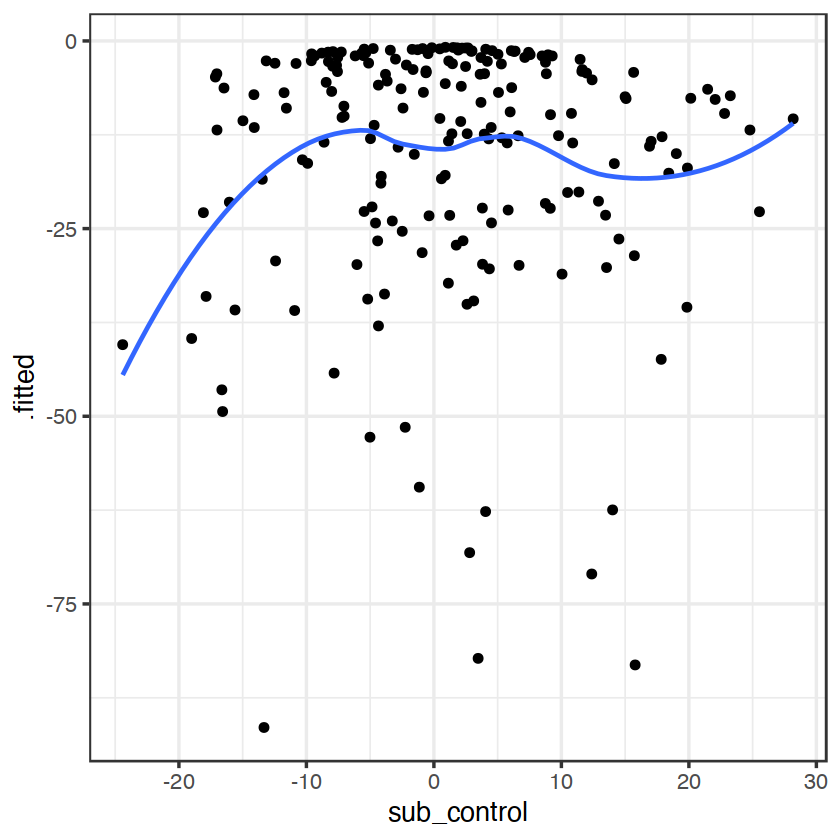

In [12]:
gf_point(.fitted ~ sub_control, data = tmp, size = 2) |> 
  gf_smooth() 

## Spline Models

There are also a type of model called spline models that can also help with the flexibility of the linear regression model. The simplest type of spline model are called linear-linear spline models. These types of models are purely linear, but the linear slope does not need to be the same across the entire span. These can be of interest when something occurs at a specific value of an attribute. 

For example (this example is completely hypothetical), imagine a situation where you are predicting anxiety symptomolgy by the age of the individual. Suppose we are interested in knowing if there are differential associations across different age spans, spline models can aid in this type of estimation. 

In [21]:
sim_args <- list(
    formula = anxiety ~ 1 + age + age_group_post + age:age_group_post,
    fixed = list(
        age = list(var_type = 'ordinal', 
        levels = 20:80)
    ),
    post = list(age_group_post = list(variable = 'age', 
                               fun = 'ifelse',
                               condition = '>= 50',
                               yes = 1,
                               no = 0)),
    error = list(variance = 50),
    sample_size = 1000,
    reg_weights = c(5, 0.05, -1, -0.1)
)

anxiety_data <- simulate_fixed(data = NULL, sim_args) |> 
  simulate_error(sim_args) |>
  generate_response(sim_args)

head(anxiety_data)

,X.Intercept.,age,age_group_post,age.age_group_post,level1_id,error,fixed_outcome,random_effects,anxiety
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
1,1,73,1,73,1,5.0962423,0.35,0,5.446242
2,1,54,1,54,2,0.2271673,1.30,0,1.527167
3,1,53,1,53,3,1.2752287,1.35,0,2.625229
4,1,43,0,0,4,-0.7279241,7.15,0,6.422076
5,1,30,0,0,5,-4.8840474,6.50,0,1.615953
6,1,42,0,0,6,-0.6623414,7.10,0,6.437659


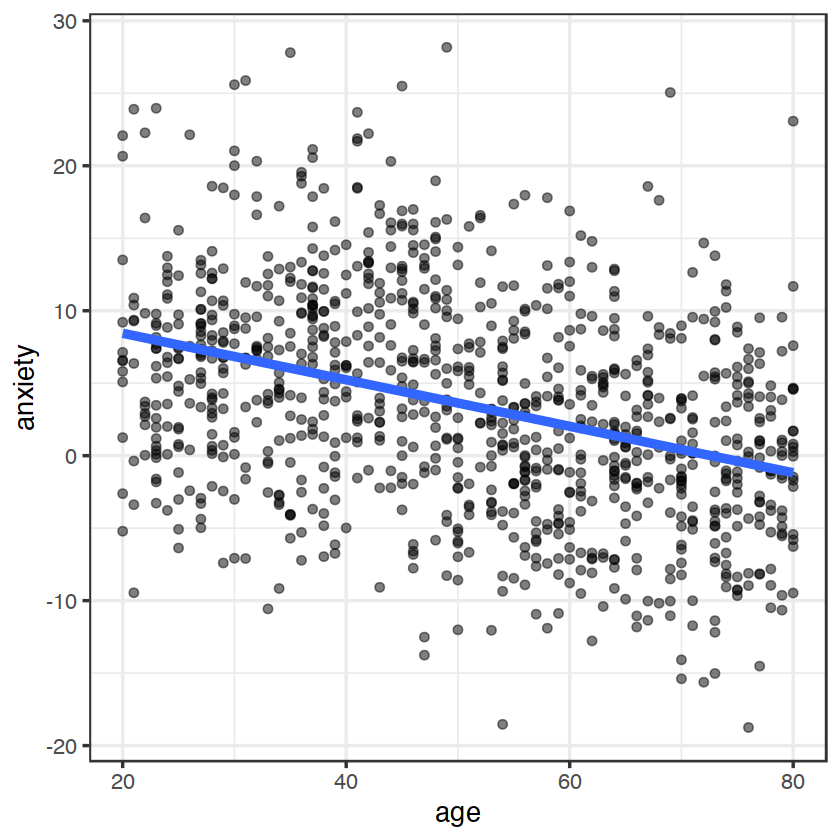

In [22]:
gf_point(anxiety ~ age, data = anxiety_data, size = 2, alpha = 0.5) |> 
  gf_smooth(method = 'lm', linewidth = 2)

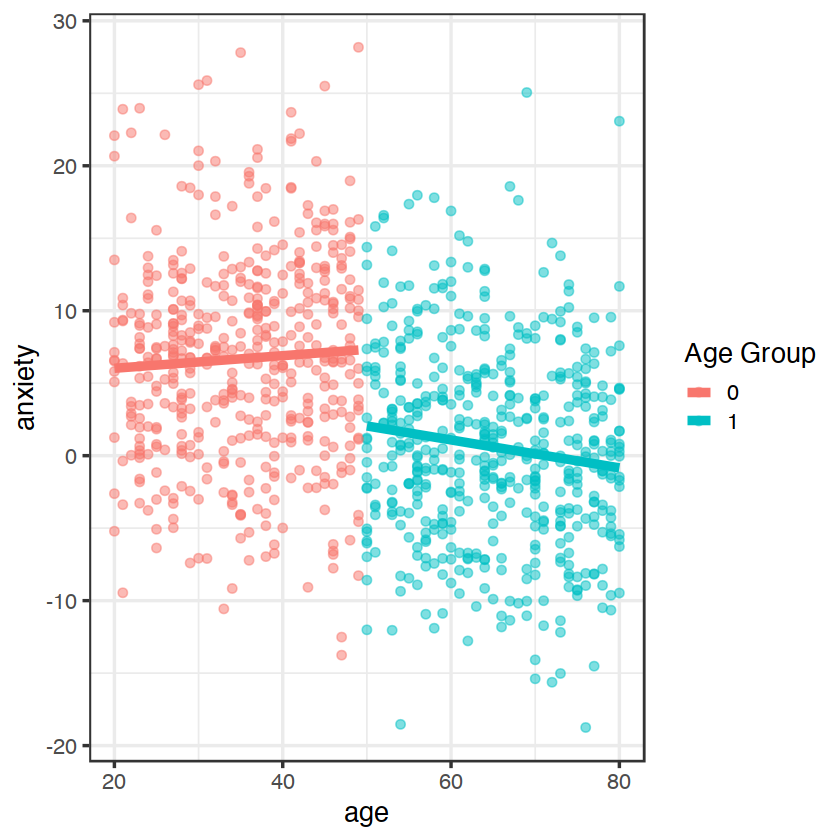

In [23]:
gf_point(anxiety ~ age, data = anxiety_data, color = ~factor(age_group_post), size = 2, alpha = 0.5) |> 
  gf_smooth(method = 'lm', linewidth = 2) |> 
  gf_labs(color = "Age Group")

In [25]:
lm(anxiety ~ 1 + age + age_group_post, data = anxiety_data) |> 
  broom::tidy() |> 
  mutate_if(is.double, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),7.857,0.944,8.324,0.000
age,-0.033,0.025,-1.315,0.189
age_group_post,-5.089,0.872,-5.838,0.000


In [26]:
lm(anxiety ~ 1 + age + age_group_post + age:age_group_post, data = anxiety_data) |> 
  broom::tidy() |> 
  mutate_if(is.double, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.161,1.356,3.807,0.000
age,0.043,0.037,1.160,0.246
age_group_post,1.706,2.608,0.654,0.513
age:age_group_post,-0.140,0.051,-2.763,0.006


In [35]:
sim_args <- list(
    formula = anxiety ~ 1 + age + age_group_post + age:age_group_post,
    fixed = list(
        age = list(var_type = 'ordinal', 
        levels = -30:30)
    ),
    post = list(age_group_post = list(variable = 'age', 
                               fun = 'ifelse',
                               condition = '>= 0',
                               yes = 1,
                               no = 0)),
    error = list(variance = 10),
    sample_size = 1000,
    reg_weights = c(5, 0.05, 0, -0.15)
)

anxiety_data2 <- simulate_fixed(data = NULL, sim_args) |> 
  simulate_error(sim_args) |>
  generate_response(sim_args)

head(anxiety_data2)

,X.Intercept.,age,age_group_post,age.age_group_post,level1_id,error,fixed_outcome,random_effects,anxiety
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
1,1,-23,0,0,1,-0.8909493,3.85,0,2.95905067
2,1,24,1,24,2,-0.3563113,2.60,0,2.24368867
3,1,18,1,18,3,-0.2574086,3.20,0,2.94259139
4,1,22,1,22,4,-2.2902888,2.80,0,0.50971116
5,1,2,1,2,5,0.4992203,4.80,0,5.29922035
6,1,-28,0,0,6,-3.6745646,3.60,0,-0.07456461


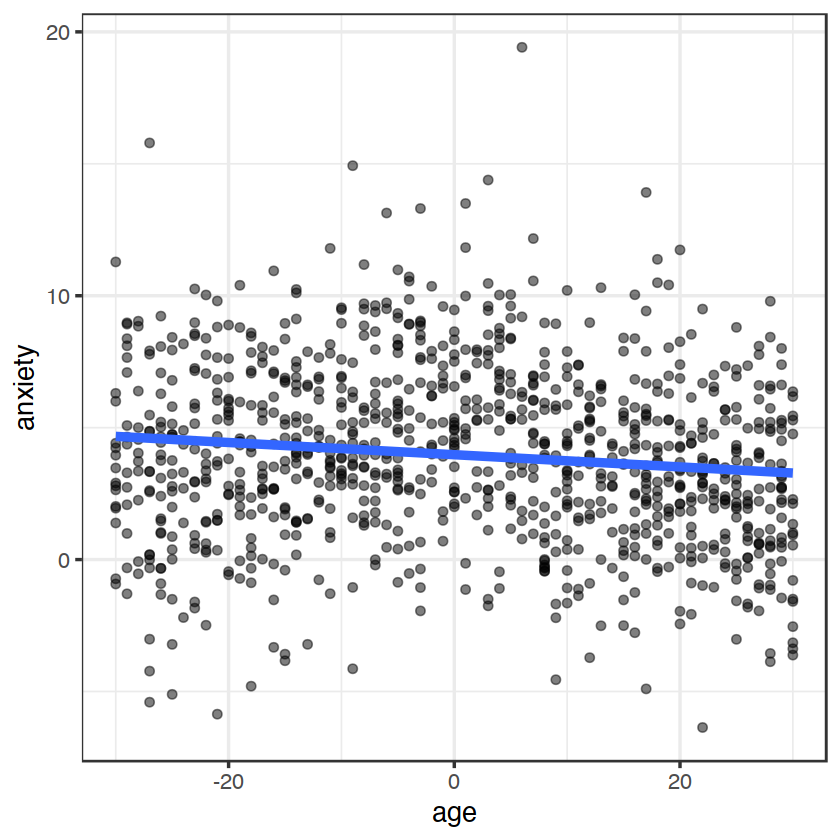

In [36]:
gf_point(anxiety ~ age, data = anxiety_data2, size = 2, alpha = 0.5) |> 
  gf_smooth(method = 'lm', linewidth = 2)

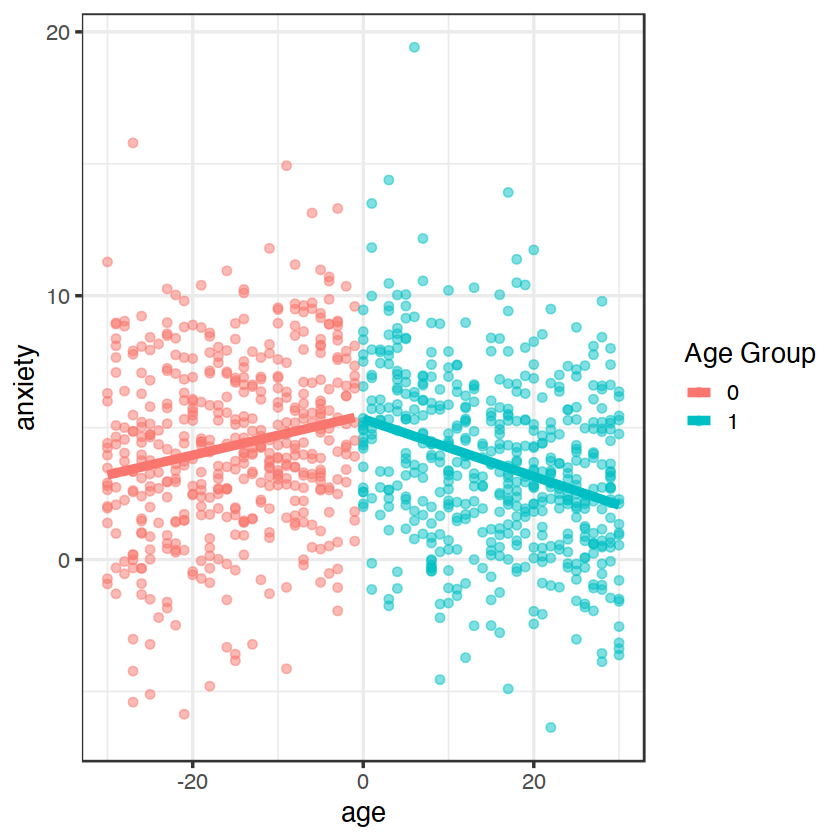

In [37]:
gf_point(anxiety ~ age, data = anxiety_data2, color = ~factor(age_group_post), size = 2, alpha = 0.5) |> 
  gf_smooth(method = 'lm', linewidth = 2) |> 
  gf_labs(color = "Age Group")

In [39]:
lm(anxiety ~ 1 + age + age_group_post, data = anxiety_data2) |> 
  broom::tidy() |> 
  mutate_if(is.double, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.881,0.240,16.190,0.000
age,-0.028,0.012,-2.311,0.021
age_group_post,0.186,0.426,0.436,0.663


In [40]:
lm(anxiety ~ 1 + age + age_group_post + age:age_group_post, data = anxiety_data2) |> 
  broom::tidy()|> 
  mutate_if(is.double, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.460,0.308,17.753,0.000
age,0.075,0.018,4.290,0.000
age_group_post,-0.132,0.416,-0.318,0.751
age:age_group_post,-0.184,0.023,-7.855,0.000


In [41]:
lm(anxiety ~ 1 + age + I(age^2), data = anxiety_data2) |> 
broom::tidy() |> 
mutate_if(is.double, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.809,0.156,30.924,0.000
age,-0.020,0.006,-3.451,0.001
I(age^2),-0.003,0.000,-7.171,0.000


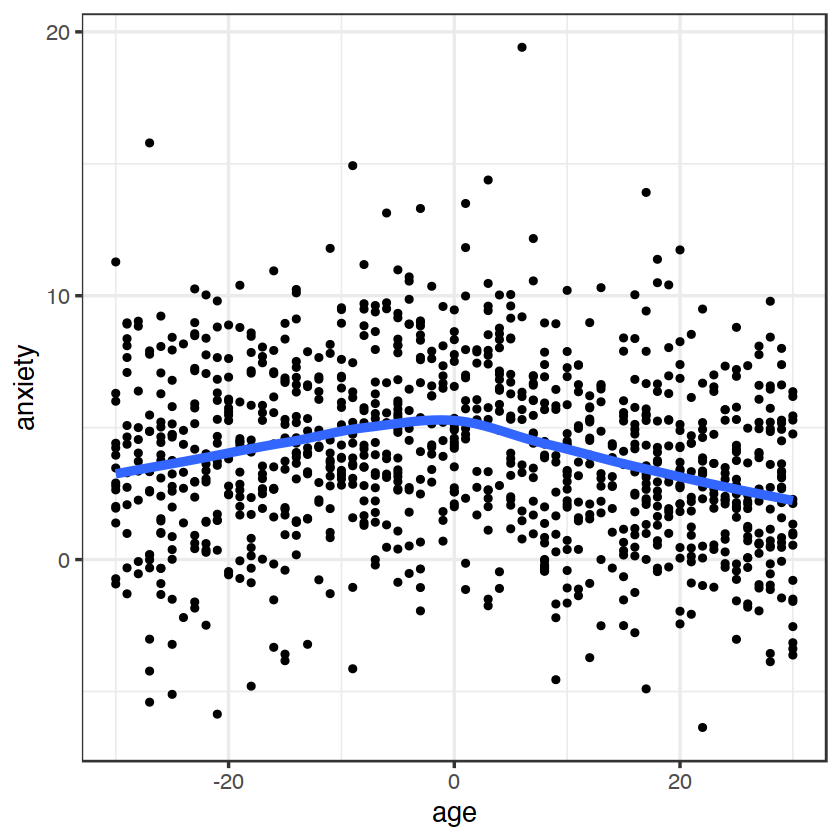

In [42]:
gf_point(anxiety ~ age, data = anxiety_data2) |> 
  gf_smooth(method = 'loess', linewidth = 2)